https://docs.google.com/document/d/1bC0AncgDeKLzopBVNSsN2-lfGAOMFBwcQQ7EHClPHqo/edit
    

# Summary

## very nice polarization dependence TiO2 001 4.5 keV psi =  160-200 deg
## measured over extended range but the first set (far from m/s peaks) looks best
## need to compare with simulations, which don't look to have correct symmetry
## tried bending a different crystal part way through; crystal broke so went back to looking at m/s
## diffcalc data in nexus file were useful

## Simulation from dynamical multiple scattering Matlab code
markdown/insert image (from local jupyter) (file in data folder under python)
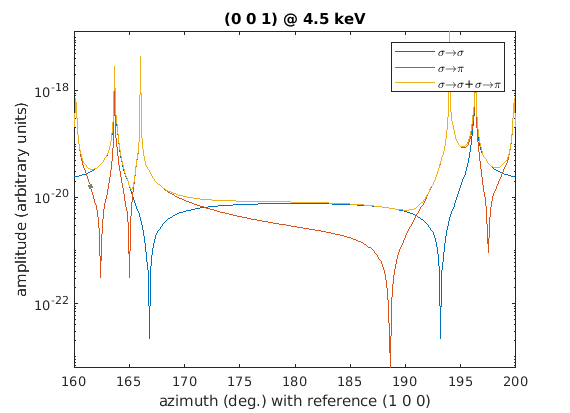

In [163]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

%matplotlib notebook
p= '/dls/i16/data/2023/cm31138-17/%i.nxs'

mod = lambda x: (x + 360) % 360 # for mapping psi to 0-360 deg

def cap(z, zmax):       # for capping z values in plot
    z[z >= zmax] = np.nan
    return z



<IPython.core.display.Javascript object>


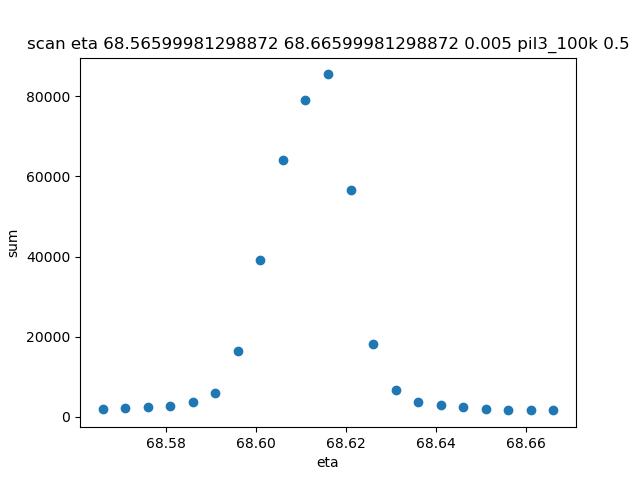

In [12]:
#002 4.5 keV atten 20 trans 2.5e-6
pdnx(p % 977694).nx.plot()


<IPython.core.display.Javascript object>


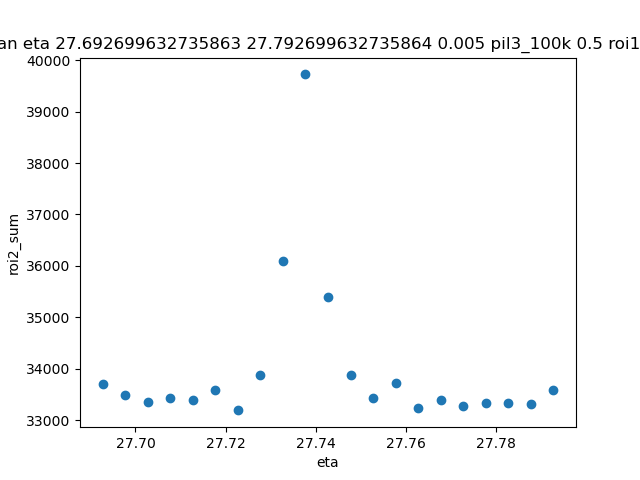

In [38]:
#699, 701
# direct beam atten 20 Cu 111 PA and merlin
# merlin energy 6 - reduces noise to almost zero but only ~ 50% efficiency

figure()
n  = pdnx(p % 977699) #pol 0
plot(n.thp, n.merlinroi1_sum)
plot(n.thp, n.merlinroi2_sum)
n  = pdnx(p % 977701) # pol 90
plot(n.thp, n.merlinroi1_sum)
plot(n.thp, n.merlinroi2_sum)
grid()

In [42]:
#101 kphi search scan 4.5 keV atten 10
# can't load !!!
n = pdnx(p % 977704)
#print(n.nx.tree)

root:NXroot
  entry1:NXentry
    before_scan:NXcollection
      PPR:NXcollection
        ppchi = -45.751840836
        pppiezo1 = 0.0
        pppiezo2 = 12345.012359999999
        ppth1 = 0.000381355
        ppth2 = 0.0013357858
        ppz1 = 7.0
        ppz2 = 10.0
      Ta:NXcollection
        Ta = 300.01
      Tb:NXcollection
        Tb = 296.537
      Tc:NXcollection
        Tc = 0.0
      Tchannel:NXcollection
        Tchannel = 1.0
      Td:NXcollection
        Td = 0.0
      Tsample:NXcollection
        Tsample = 300.01
      alpha:NXcollection
        alpha = -61.454932151194846
      beamline_slits:NXcollection
        s1xcentre = -0.009
        s1xgap = 1.001
        s1ycentre = -0.079
        s1ygap = 0.897
        s2xcentre = -0.085725
        s2xgap = 19.999325
        s2ycentre = 0.308
        s2ygap = 20.0005
        s3xcentre = -4.1055
        s3xgap = 41.082
        s3ycentre = 0.3495
        s3ygap = 20.0055
        s4xcentre = -6.4965
        s4xgap = 39.0015
      

<IPython.core.display.Javascript object>


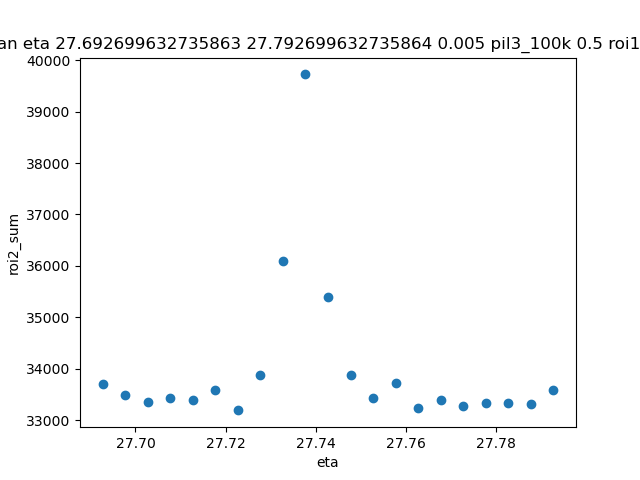

In [54]:
#001 psi = 180
pdnx(p % 977711).nx.plot()

In [231]:
### show diffcalc data for experiment

import json
import pprint

n = pdnx(p % 978999) # last scan

dc = json.loads(str(n.nx.entry1.before_scan.ubMeta.value))
pprint.pprint(dc)

#write out diffcalc json file (if required)
#with open('diffcalc_tmp.json', 'w') as f:
#    json.dump(dc, f)

{'crystal': "[u'TiO2', 'Tetragonal', 4.5937, 4.5937, 2.9587, 90.0, 90.0, 90.0]",
 'name': 'TiO2_feb2023',
 'or0': 7,
 'or1': 2,
 'orientlist': {},
 'reference': {'n_hkl_configured': '[1.0, 0.0, 0.0]', 'n_phi_configured': None},
 'reflist': {'1': {'energy': 4.5,
                   'hkl': '[0.0, 0.0, 2.0]',
                   'pos': '[2.0585e-06, 137.251999625979, 7.2975e-06, '
                          '68.61599981298872, 90.00000034852737, '
                          '6.999999999998728]',
                   'tag': '002 4.5 keV',
                   'time': '2023-02-15T15:53:31.079000'},
             '2': {'energy': 4.5,
                   'hkl': '[1.0, 0.0, 1.0]',
                   'pos': '[0.0, 67.260244157257, 0.0, 33.63012207862893, '
                          '57.26343264308351, -37.834015141759075]',
                   'tag': 101.0,
                   'time': '2023-02-15T18:44:38.156000'},
             '3': {'energy': 4.5,
                   'hkl': '[0.0, 0.0, 1.0]',
             

<IPython.core.display.Javascript object>


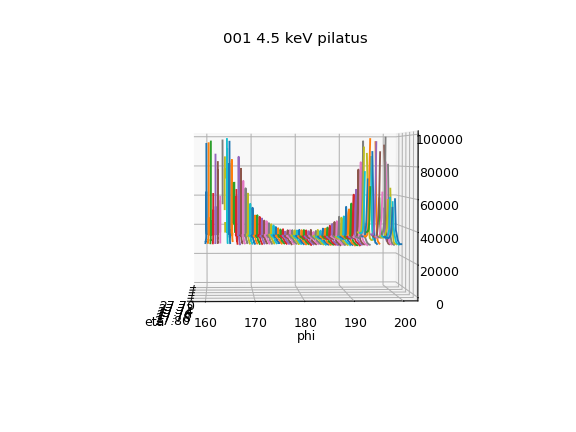

<IPython.core.display.Javascript object>


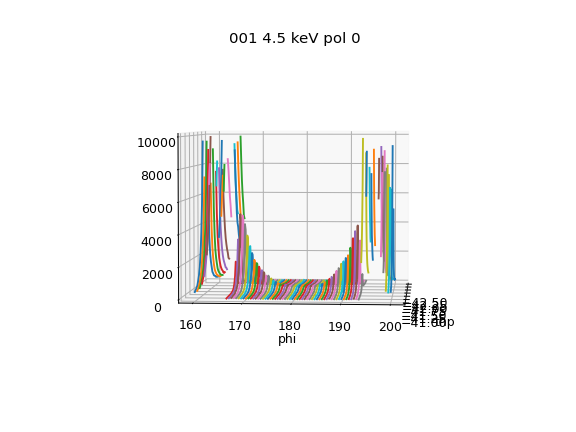

<IPython.core.display.Javascript object>


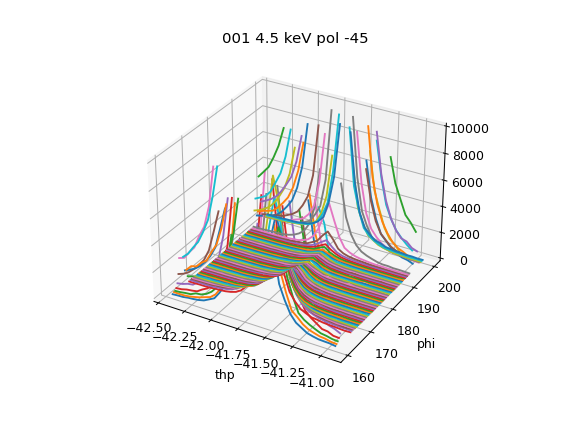

<IPython.core.display.Javascript object>


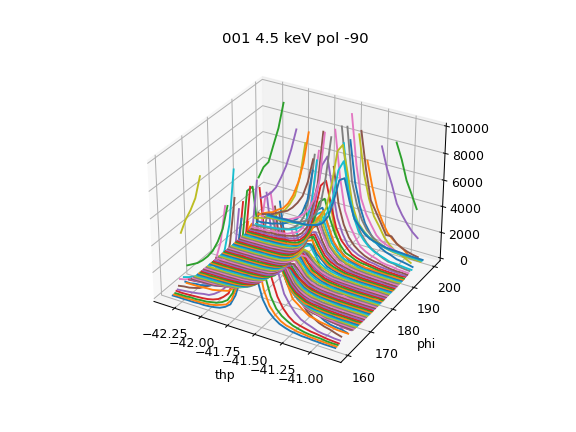

<IPython.core.display.Javascript object>


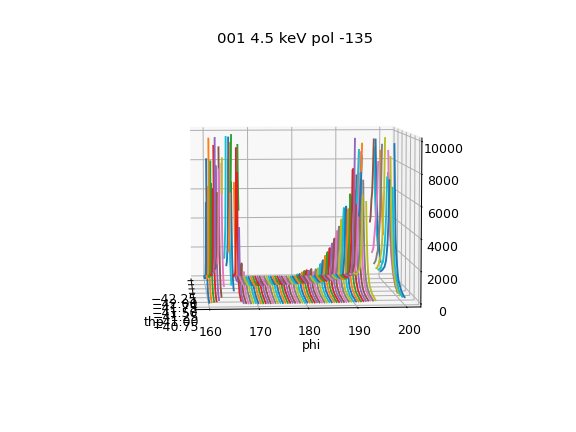

Text(0.5, 0.92, '001 4.5 keV pol -135')

In [263]:
# pilatus and PA intensities (0, -45, -90, -135 deg) vs psi - 3d data
# first dataset only: psi 160-200

### Pilatus (total intensity)

from mpl_toolkits import mplot3d

zmax = 1e5

ax = figure().gca(projection='3d')
for i in range(977750, 978235+1, 6):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.eta, n.psi, cap(n.roi2_sum, zmax))        
        xlabel('eta'); ylabel('phi')
title('001 4.5 keV pilatus')
ax.set_zlim(0,1e5)


### PA

zmax = 1e4

ax = figure().gca(projection='3d')
for i in range(977752, 978235+1, 6):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.thp, n.psi, cap(n.merlinroi2_sum, zmax))       
        xlabel('thp'); ylabel('phi')
ax.set_zlim(0, zmax)
title('001 4.5 keV pol 0')


ax = figure().gca(projection='3d')
for i in range(977753, 978235+1, 6):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.thp, n.psi, cap(n.merlinroi2_sum, zmax))       
        xlabel('thp'); ylabel('phi')
ax.set_zlim(0, zmax)
title('001 4.5 keV pol -45')

ax = figure().gca(projection='3d')
for i in range(977754, 978235+1, 6):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.thp, n.psi, cap(n.merlinroi2_sum, zmax))       
        xlabel('thp'); ylabel('phi')
ax.set_zlim(0, zmax)
title('001 4.5 keV pol -90')

ax = figure().gca(projection='3d')
for i in range(977755, 978235+1, 6):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.thp, n.psi, cap(n.merlinroi2_sum, zmax))       
        xlabel('thp'); ylabel('phi')
ax.set_zlim(0, zmax)
title('001 4.5 keV pol -135')





<IPython.core.display.Javascript object>


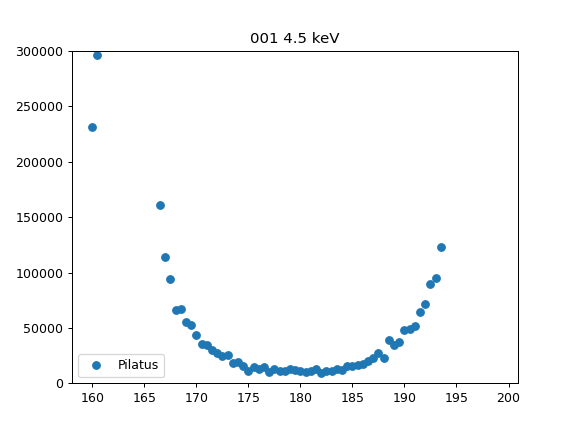

<IPython.core.display.Javascript object>


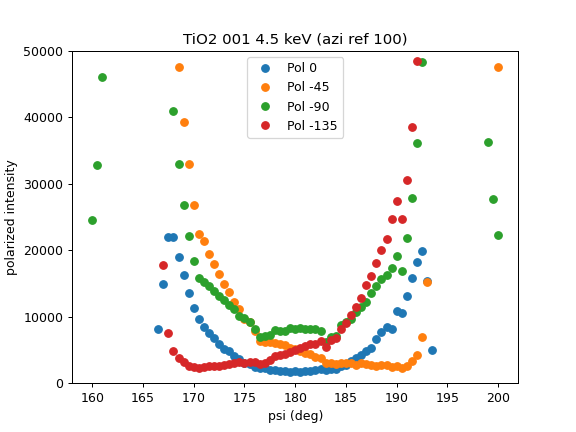

Text(0.5, 1.0, '001 4.5 keV')

In [292]:
# integrated peak intensities for psi=160-200

figure()

sum_cts, psi = [], []
for i in range(977750, 978220+1, 6):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.eta, n.roi2_sum, nbgpts=3)
        sum_cts += [sum]     
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pilatus')

legend()
ylim(0, 3e5)
title('001 4.5 keV')



figure()

sum_cts, psi = [], []
for i in range(977752, 978235+1, 6):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.thp, n.merlinroi2_sum, nbgpts=3)
        sum_cts += [sum]     
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pol 0')


sum_cts, psi = [], []
for i in range(977753, 978235+1, 6):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.thp, n.merlinroi2_sum, nbgpts=3)
        sum_cts += [sum]        
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pol -45')


sum_cts, psi = [], []
for i in range(977754, 978235+1, 6):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.thp, n.merlinroi2_sum, nbgpts=3)
        sum_cts += [sum]        
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pol -90')


sum_cts, psi = [], []
for i in range(977755, 978235+1, 6):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.thp, n.merlinroi2_sum, nbgpts=3)
        sum_cts += [sum]        
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pol -135')

legend()
ylim(0, 50000)
xlabel('psi (deg)')
ylabel('polarized intensity')
title('TiO2 001 4.5 keV (azi ref 100)')
savefig('TiO2 001 4p5 keV.pdf')

<IPython.core.display.Javascript object>


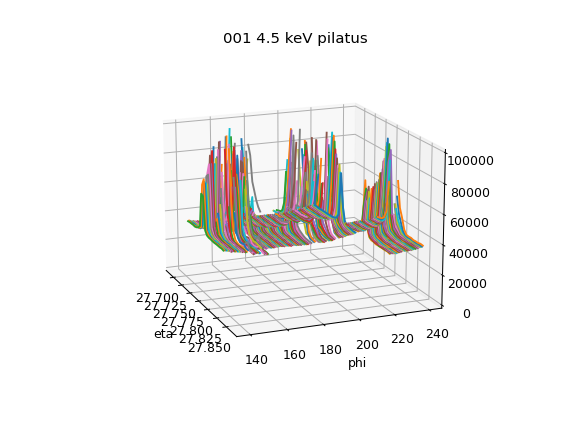

<IPython.core.display.Javascript object>


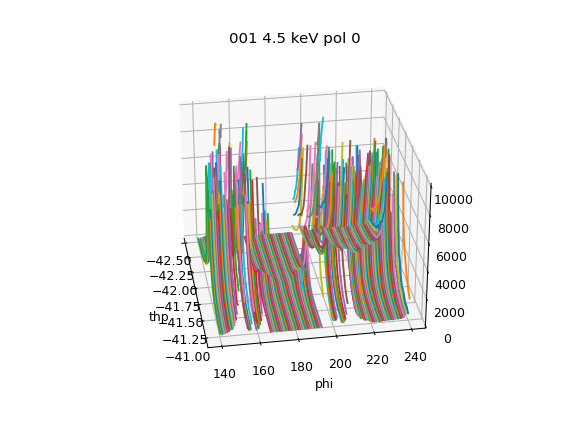

<IPython.core.display.Javascript object>


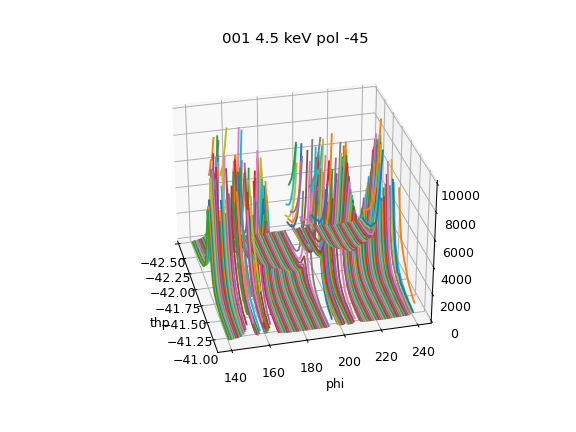

<IPython.core.display.Javascript object>


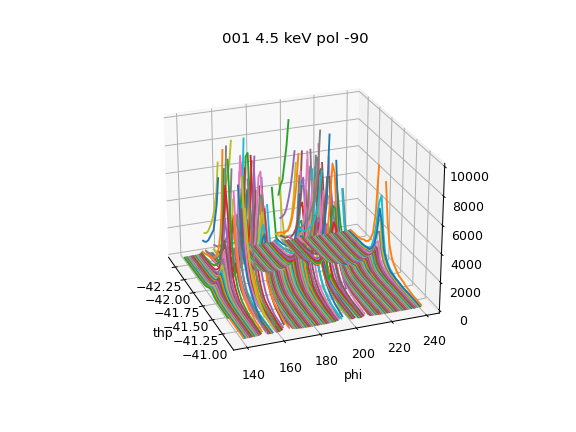

<IPython.core.display.Javascript object>


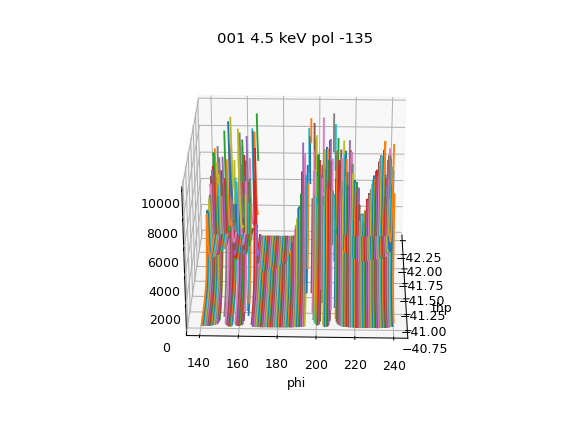

Text(0.5, 0.92, '001 4.5 keV pol -135')

In [289]:
# pilatus and PA intensities (0, -45, -90, -135 deg) vs psi - 3d data
# all datasets together

### Pilatus (total intensity)

from mpl_toolkits import mplot3d

zmax = 1e5

ax = figure().gca(projection='3d')
for i in list(range(977750, 978235+1, 6)) + list(range(978236, 978475+1, 6)) + list(range(978509, 978999+1, 6)):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.eta, n.psi, cap(n.roi2_sum, zmax))        
        xlabel('eta'); ylabel('phi')
title('001 4.5 keV pilatus')
ax.set_zlim(0,1e5)


### PA

zmax = 1e4

ax = figure().gca(projection='3d')
#for i in range(977752, 978235+1, 6):
for i in list(range(977750+2, 978235+1, 6)) + list(range(978236+2, 978475+1, 6)) + list(range(978509+2, 978999+1, 6)):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.thp, n.psi, cap(n.merlinroi2_sum, zmax))       
        xlabel('thp'); ylabel('phi')
ax.set_zlim(0, zmax)
title('001 4.5 keV pol 0')


ax = figure().gca(projection='3d')
#for i in range(977753, 978235+1, 6):
for i in list(range(977750+3, 978235+1, 6)) + list(range(978236+3, 978475+1, 6)) + list(range(978509+3, 978999+1, 6)):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.thp, n.psi, cap(n.merlinroi2_sum, zmax))       
        xlabel('thp'); ylabel('phi')
ax.set_zlim(0, zmax)
title('001 4.5 keV pol -45')

ax = figure().gca(projection='3d')
#for i in range(977754, 978235+1, 6):
for i in list(range(977750+4, 978235+1, 6)) + list(range(978236+4, 978475+1, 6)) + list(range(978509+4, 978999+1, 6)):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.thp, n.psi, cap(n.merlinroi2_sum, zmax))       
        xlabel('thp'); ylabel('phi')
ax.set_zlim(0, zmax)
title('001 4.5 keV pol -90')

ax = figure().gca(projection='3d')
#for i in range(977755, 978235+1, 6):
for i in list(range(977750+5, 978235+1, 6)) + list(range(978236+5, 978475+1, 6)) + list(range(978509+5, 978999+1, 6)):
        n = pdnx(p % i)
        n['psi'] = mod(float(n.nx.entry1.before_scan.psi.psi))
        ax.plot(n.thp, n.psi, cap(n.merlinroi2_sum, zmax))       
        xlabel('thp'); ylabel('phi')
ax.set_zlim(0, zmax)
title('001 4.5 keV pol -135')



<IPython.core.display.Javascript object>


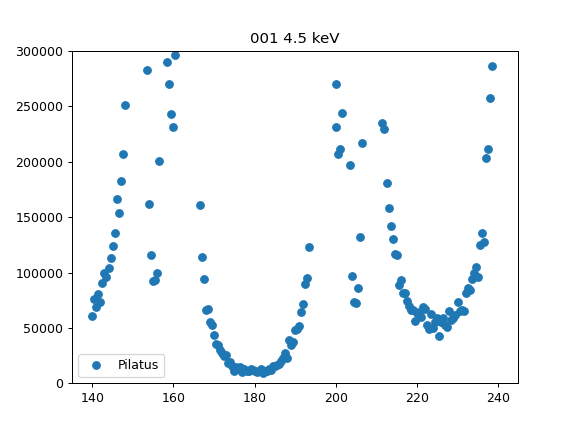

<IPython.core.display.Javascript object>


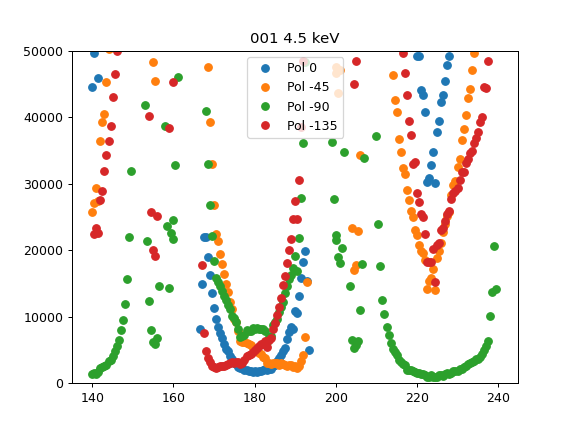

Text(0.5, 1.0, '001 4.5 keV')

In [290]:
# integrated peak intensities for all datasets together

figure()

sum_cts, psi = [], []
#for i in range(977750, 978220+1, 6):
for i in list(range(977750, 978235+1, 6)) + list(range(978236, 978475+1, 6)) + list(range(978509, 978999+1, 6)):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.eta, n.roi2_sum, nbgpts=3)
        sum_cts += [sum]     
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pilatus')

legend()
ylim(0, 3e5)
title('001 4.5 keV')



figure()

sum_cts, psi = [], []
#for i in range(977752, 978235+1, 6):
for i in list(range(977750+2, 978235+1, 6)) + list(range(978236+2, 978475+1, 6)) + list(range(978509+2, 978999+1, 6)):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.thp, n.merlinroi2_sum, nbgpts=3)
        sum_cts += [sum]     
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pol 0')


sum_cts, psi = [], []
#for i in range(977753, 978235+1, 6):
for i in list(range(977750+3, 978235+1, 6)) + list(range(978236+3, 978475+1, 6)) + list(range(978509+3, 978999+1, 6)):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.thp, n.merlinroi2_sum, nbgpts=3)
        sum_cts += [sum]        
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pol -45')


sum_cts, psi = [], []
#for i in range(977754, 978235+1, 6):
for i in list(range(977750+4, 978235+1, 6)) + list(range(978236+4, 978475+1, 6)) + list(range(978509+4, 978999+1, 6)):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.thp, n.merlinroi2_sum, nbgpts=3)
        sum_cts += [sum]        
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pol -90')


sum_cts, psi = [], []
#for i in range(977755, 978235+1, 6):
for i in list(range(977750+5, 978235+1, 6)) + list(range(978236+5, 978475+1, 6)) + list(range(978509+5, 978999+1, 6)):
        n = pdnx(p % i)
        psi += [float(n.nx.entry1.before_scan.psi.psi)]
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.thp, n.merlinroi2_sum, nbgpts=3)
        sum_cts += [sum]        
sum_cts, psi = np.array(sum_cts), mod(np.array(psi))       
plot(psi, sum_cts, 'o', label = 'Pol -135')




legend()
ylim(0, 50000)
title('001 4.5 keV')


Crystal properties

                    CIF file:  /home/spc93/spc_cifs/TiO2_rutile_icsd_gonschorek_31321.cif
                     Lattice:  4.594 4.594 2.959 90.00 90.00 90.00
                   All sites:  Ti1, O1
               Site selected:  Ti1
                 Site vector:  0.000 0.000 0.000
       No. of spacegroup ops:  16
      No. of sym ops at site:  8
 No. of equiv. sites in cell:  2
   No. of pg ops for crystal:  16

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True


<IPython.core.display.Javascript object>


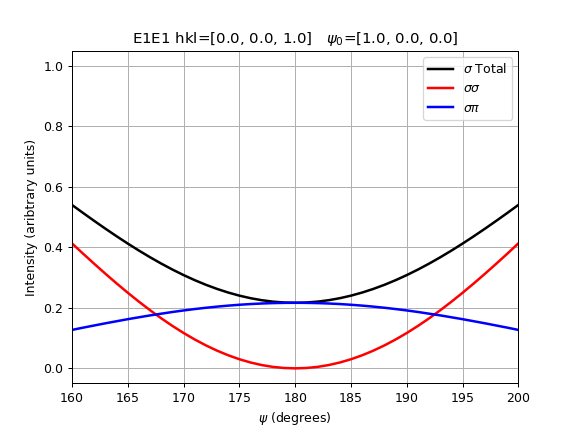

(160.0, 200.0)

In [301]:
import TensorScatteringClass as ten
import numpy as np


t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/TiO2_rutile_icsd_gonschorek_31321.cif', Site='Ti1');

t.PlotIntensityInPolarizationChannels('E1E1', lam=12.4/4.5, hkl=np.array([0,0,1]), hkln=np.array([1,0,0]), K=2, Time=+1, Parity=+1, sigmapi='sigma')
xlim([160, 200])


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.


Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Even
                        Time:  Either
                          PT:  Either
              Glide or screw:  True

Tensor properties

             Required parity:  Even
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 1.

<IPython.core.display.Javascript object>


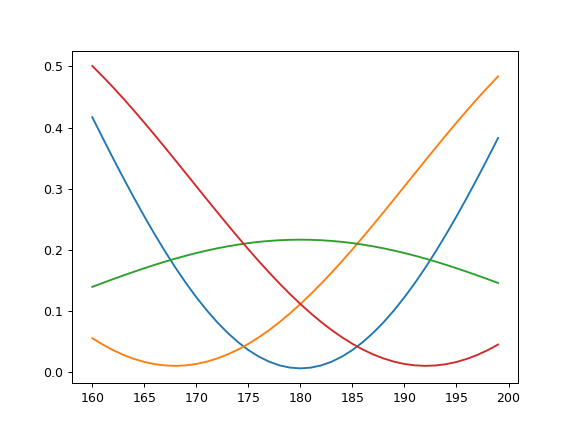

In [330]:
pol = 0
psi = 180
psi = np.arange(160, 200, 1)
polvals = [0, -45, -90, -135]
counts = {}

for i in range(4):
    counts[i] = []
    for psival in psi:
        counts[i] += [t.CalculateIntensityFromPolarizationAnalyser('E1E1', 12.4/4.5, np.array([0,0,1]), np.array([1,0,0]), psival, 
                                             polvals[i], pol_th_deg = 40, K = 2, Time = 1, Parity = 1)]
        
figure()
for i in range(4):
    plot(psi, counts[i])
    
savefig('TiO2 001 4p5 keV E1E1.pdf')    

MS Reflections: 104
1 of 60
2 of 60
3 of 60
4 of 60
5 of 60
6 of 60
7 of 60
8 of 60
9 of 60
10 of 60
11 of 60
12 of 60
13 of 60
14 of 60
15 of 60
16 of 60
17 of 60
18 of 60
19 of 60
20 of 60
21 of 60
22 of 60
23 of 60
24 of 60
25 of 60
26 of 60
27 of 60
28 of 60
29 of 60
30 of 60
31 of 60
32 of 60
33 of 60
34 of 60
35 of 60
36 of 60
37 of 60
38 of 60
39 of 60
40 of 60
41 of 60
42 of 60
43 of 60
44 of 60
45 of 60
46 of 60
47 of 60
48 of 60
49 of 60
50 of 60
51 of 60
52 of 60
53 of 60
54 of 60
55 of 60
56 of 60
57 of 60
58 of 60
59 of 60
60 of 60


/dls_sw/i16/software/python/userscripts/i16user/Dans_Diffraction/Dans_Diffraction/multiple_scattering.py:374: RuntimeWarning: invalid value encountered in arcsin
  rewl = ko * np.cos((np.arcsin(
/dls_sw/i16/software/python/userscripts/i16user/Dans_Diffraction/Dans_Diffraction/multiple_scattering.py:385: RuntimeWarning: invalid value encountered in sqrt
  xintercept = np.sqrt(np.square(rewl) - np.square(


<IPython.core.display.Javascript object>


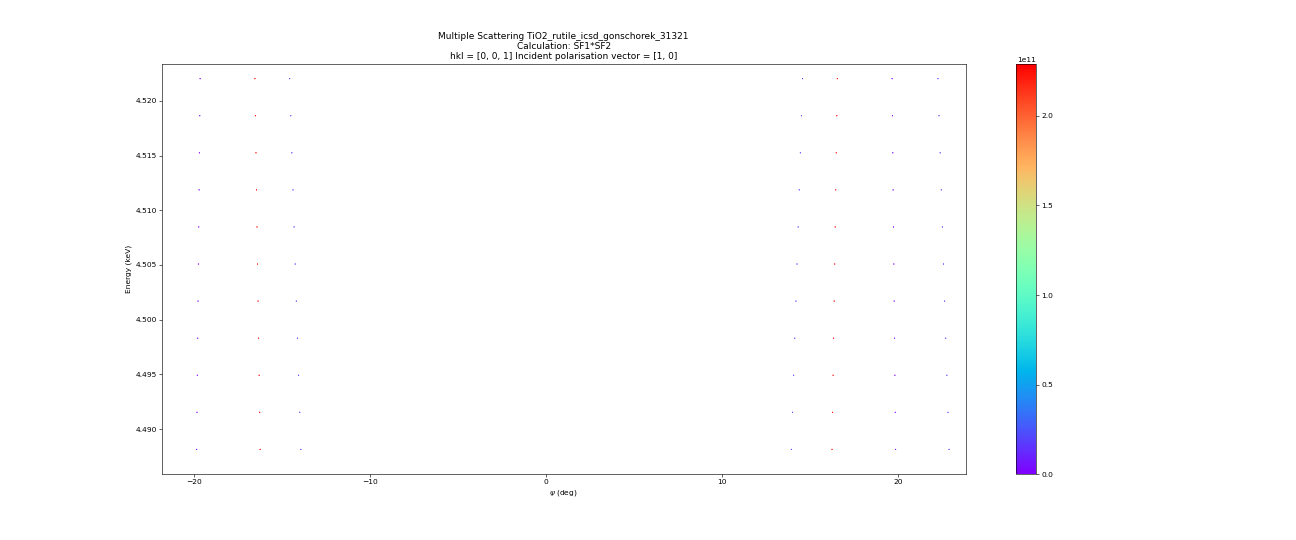

In [1]:
"""
Plot multiple scattering using Dans_Diffraction

install Dans_Diffraction using:
$ pip install dans_diffraction

or download using:
$ git clone https://github.com/DanPorter/Dans_Diffraction.git

"""

import sys, os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
sys.path.insert(0, '/dls_sw/i16/software/python/userscripts/i16user/Dans_Diffraction') 

import Dans_Diffraction as dif

#cif_file=r"C:\Users\dgpor\OneDrive - Diamond Light Source Ltd\CIF_Files\Na0.8CoO2_P63mmc.cif"
cif_file = '/home/spc93/spc_cifs/TiO2_rutile_icsd_gonschorek_31321.cif'

xtl = dif.Crystal(cif_file)

xtl.Plot.plot_multiple_scattering([0,0,1], [1,0,0], energy_range=[4.4, 4.6])

#xtl.Plot.plot_ms_azimuth([0, 0, 6], 7.243, [1, 0, 0], peak_width=0.1)
#plt.show()

